<a href="https://colab.research.google.com/github/CerberDev/Faculdade/blob/main/Gabarito_Pandas_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resumos e um pouco de Visualização no pandas


## Resumo

Vamos ver alguns métodos para analisar nossas tabelas (dataframes)

Além disso, vamos usar os plot de gráfico padrões do pandas, mas no projeto de DataScience veremos outras mais bonitas e também muito práticas.

OBS: O pandas usa o matplotlib (que vimos na seção de "módulos e bibliotecas") para plotar gráficos.<br>
Se quiser personalizar mais do que o padrão do pandas, importe o matplotlib e use os métodos do matplotlib

In [5]:
#comando para fazer upload de arquivos no google colab
from google.colab import files

uploaded = files.upload()


Saving Contoso - Cadastro Produtos.csv to Contoso - Cadastro Produtos.csv
Saving Contoso - Clientes.csv to Contoso - Clientes.csv
Saving Contoso - Lojas.csv to Contoso - Lojas.csv
Saving Contoso - Promocoes.csv to Contoso - Promocoes.csv
Saving Contoso - Vendas - 2017.csv to Contoso - Vendas - 2017.csv


- Preparando as bases de dados (o que fizemos na última aula)

In [10]:
import pandas as pd
#importando os arquivos
vendas_df = pd.read_csv(r'Contoso - Vendas - 2017.csv', sep=';')
produtos_df = pd.read_csv(r'Contoso - Cadastro Produtos.csv', sep=';')
lojas_df = pd.read_csv(r'Contoso - Lojas.csv', sep=';')
clientes_df = pd.read_csv(r'Contoso - Clientes.csv', sep=';')

#limpando apenas as colunas que queremos
clientes_df = clientes_df[['ID Cliente', 'E-mail']]
rodutos_df = produtos_df[['ID Produto', 'Nome do Produto']]
lojas_df = lojas_df[['ID Loja', 'Nome da Loja']]

#mesclando e renomeando os dataframes
vendas_df = vendas_df.merge(produtos_df, on='ID Produto')
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')
vendas_df = vendas_df.merge(clientes_df, on='ID Cliente').rename(columns={'E-mail': 'E-mail do Cliente'})
display(vendas_df)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Descricao do Produto,Fabricante,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Subcategoria,Nome da Loja,E-mail do Cliente
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,"Digital camera, product type digital camera, d...",A. Datum Corporation,A. Datum,Regular,"86,68","188,5",23,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Litware Home Theater System 7.1 Channel M710 B...,130 watts total output on 2-way bass reflex fr...,"Litware, Inc.",Litware,Regular,"264,72",799,11,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
2,191019,20/03/2017,21/03/2017,1,172,376,2,6825,9,0,Adventure Works Laptop12 M1201 Silver,"80GB hard drive, 512MB memory",Adventure Works,Adventure Works,Regular,"195,24","382,95",15,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp
3,18610,08/01/2017,10/01/2017,2,200,448,2,6825,48,0,WWI Desktop PC1.80 E1801 Black,"1.80GHz dual processor, 4GB DDR2 memory, 400GB...",Wide World Importers,Wide World Importers,Econômico,"137,6","269,9",17,Loja Contoso Catalog,rbrumfieldmy@ameblo.jp
4,287704,23/04/2017,26/04/2017,3,76,280,1,6825,10,0,Contoso Home Theater System 2.1 Channel M1210 ...,"2.1 channel home theater system, includes 2 fr...","Contoso, Ltd",Contoso,Regular,"167,73",329,11,Loja Contoso Beaumont No.1,rbrumfieldmy@ameblo.jp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,878244,23/11/2017,23/11/2017,0,110,889,4,347,12,1,Contoso Bluetooth Notebook Mouse E70 Silver,Transceiver-free wireless connection to your P...,"Contoso, Ltd",Contoso,Econômico,"25,49",50,22,Loja Contoso Orlando,edowner9m@imdb.com
980638,920243,09/12/2017,10/12/2017,1,261,1367,5,38781,13,0,Contoso Expandable 3-Handset Cordless Phone Sy...,"Additional handset for phone systems, light-up...","Contoso, Ltd",Contoso,Regular,"16,55","35,99",29,Loja Contoso Damascus No.1,ruben31@adventure-works.com
980639,467482,21/06/2017,25/06/2017,4,115,269,1,553,10,0,Contoso Home Theater System 4.1 Channel M1400 ...,"4.1 channel front surround, 1080p/720p up conv...","Contoso, Ltd",Contoso,Regular,"208,52",409,11,Loja Contoso New York No.1,akuhnertfc@themeforest.net
980640,853643,13/11/2017,20/11/2017,7,115,809,4,38860,6,0,Contoso Dual USB Power Adapter - power adapter...,Dual USB power adapter - power adapter,"Contoso, Ltd",Contoso,Econômico,"20,34","39,9",22,Loja Contoso New York No.1,anne5@adventure-works.com


### Qual cliente que comprou mais vezes?

- Usaremos o método .value_counts() para contar quantas vezes cada valor do Dataframe aparece
- Usaremos o método .plot() para exibir um gráfico

karen33@adventure-works.com      77
chloe77@adventure-works.com      74
julia43@adventure-works.com      69
josé64@adventure-works.com       68
destiny66@adventure-works.com    68
                                 ..
vshave74@oaic.gov.au              1
csalefy@ning.com                  1
okaret19@themeforest.net          1
aromainhy@narod.ru                1
pfeldonie@privacy.gov.au          1
Name: E-mail do Cliente, Length: 38907, dtype: int64

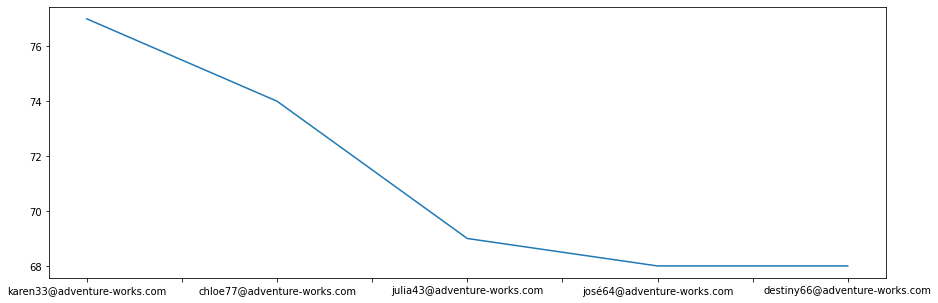

In [ ]:
frequencia_clientes = vendas_df['E-mail do Cliente'].value_counts()
display(frequencia_clientes)
frequencia_clientes[:5].plot(figsize=(15, 5))

### Qual a Loja que mais vendeu?

- Usaremos o .groupby para agrupar o nosso dataframe, de acordo com o que queremos (somando as quantidades de vendas, por exemplo)

In [11]:
#ponto groupby está agrupando todo os nomes das lojas o ponto sum está somando os valores das vendas que tem na coluna nome da loja
vendas_lojas = vendas_df.groupby('Nome da Loja').sum()
vendas_lojas = vendas_lojas[['Quantidade Vendida']]
display(vendas_lojas)

<ipython-input-11-b2521307c4f7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  vendas_lojas = vendas_df.groupby('Nome da Loja').sum()


,Quantidade Vendida
Nome da Loja,
Loja Contoso Albany,26353
Loja Contoso Alexandria,26247
Loja Contoso Amsterdam,28294
Loja Contoso Anchorage,27451
Loja Contoso Annapolis,26065
...,...
Loja Contoso Yokohama,28023
Loja Contoso York,27164
Loja Contoso koln No.1,29046


- Agora precisamos pegar o maior valor. Temos 2 formas:
    1. Ordenar o dataframe em ordem decrescente de Quantidade Vendida
        - Método .sort_values
    2. Pegar o Maior valor diretamente
        - Métodos .max() e .idxmax()

,Quantidade Vendida
Nome da Loja,
Loja Contoso Catalog,1029117
Loja Contoso North America Online,701961
Loja Contoso Europe Online,616845
Loja Contoso Asia Online,578458
Loja Contoso North America Reseller,520176
...,...
Loja Contoso Berlin,379
Loja Contoso Paterson,371
Loja Contoso Marseille,370


<Axes: xlabel='Nome da Loja'>

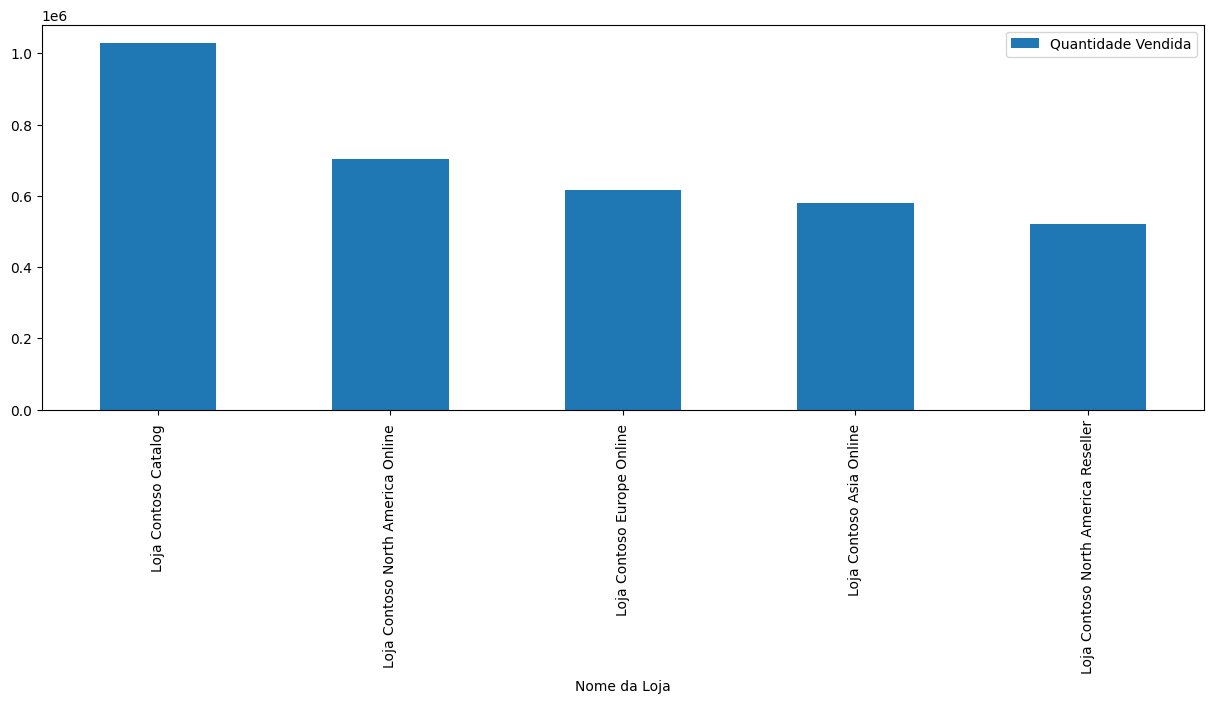

In [12]:
#ordenando o dataframe
vendas_lojas = vendas_lojas.sort_values('Quantidade Vendida', ascending = False)
display(vendas_lojas)
#podemos plotar em um gráfico
vendas_lojas[:5].plot(figsize=(15, 5), kind='bar')

In [13]:
#pegando o maior valor e se índice
maior_valor = vendas_lojas['Quantidade Vendida'].max()
melhor_loja = vendas_lojas['Quantidade Vendida'].idxmax()
print(melhor_loja, maior_valor)


Loja Contoso Catalog  1029117
1029117


### Qual produto que menos vendeu?

- Já temos uma lista criada para isso, basta verificarmos o final da lista (já que ela está ordenada) ou então usarmos os métodos:
    1. min()
    2. idxmin()

In [15]:
#pegando a loja que menos vendeu do data frame,como no bloco de cima foi formatado data frame ele ficou com indice, logo foi só por o [-1:] menos um até o final.
vendas_lojas[-1:]

,Quantidade Vendida
Nome da Loja,
Loja Contoso Venezia,234
